In [150]:
import json
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
set_style("whitegrid")

In [3]:
# Opening JSON file
f = open('data/train.json')

# parse x:
y = json.load(f)

y

[{'id': 10259,
  'cuisine': 'greek',
  'ingredients': ['romaine lettuce',
   'black olives',
   'grape tomatoes',
   'garlic',
   'pepper',
   'purple onion',
   'seasoning',
   'garbanzo beans',
   'feta cheese crumbles']},
 {'id': 25693,
  'cuisine': 'southern_us',
  'ingredients': ['plain flour',
   'ground pepper',
   'salt',
   'tomatoes',
   'ground black pepper',
   'thyme',
   'eggs',
   'green tomatoes',
   'yellow corn meal',
   'milk',
   'vegetable oil']},
 {'id': 20130,
  'cuisine': 'filipino',
  'ingredients': ['eggs',
   'pepper',
   'salt',
   'mayonaise',
   'cooking oil',
   'green chilies',
   'grilled chicken breasts',
   'garlic powder',
   'yellow onion',
   'soy sauce',
   'butter',
   'chicken livers']},
 {'id': 22213,
  'cuisine': 'indian',
  'ingredients': ['water', 'vegetable oil', 'wheat', 'salt']},
 {'id': 13162,
  'cuisine': 'indian',
  'ingredients': ['black pepper',
   'shallots',
   'cornflour',
   'cayenne pepper',
   'onions',
   'garlic paste',
   'm

In [49]:
y[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

-> 9 ingredients

### Training set in a DataFrame.

In [4]:
import pandas as pd

df = pd.DataFrame(y)


df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


There is no missing data point.

In [31]:
df.iloc[:,0]

0        10259
1        25693
2        20130
3        22213
4        13162
         ...  
39769    29109
39770    11462
39771     2238
39772    41882
39773     2362
Name: id, Length: 39774, dtype: int64

In [12]:
df['cuisine'].nunique()

20

In [14]:
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

There are 20 cuisines.

### recipe-counts by cuisine

In [45]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [46]:
df['cuisine'].value_counts()/39774

italian         0.197063
mexican         0.161865
southern_us     0.108614
indian          0.075502
chinese         0.067205
french          0.066526
cajun_creole    0.038870
thai            0.038694
japanese        0.035777
greek           0.029542
spanish         0.024865
korean          0.020868
vietnamese      0.020742
moroccan        0.020642
british         0.020214
filipino        0.018982
irish           0.016770
jamaican        0.013225
russian         0.012294
brazilian       0.011741
Name: cuisine, dtype: float64

The distribution of the recipes by cuisine is not uniform. 'italian' takes 20% for maximum, mexican is followed for 16%, and brazilian is 1% for the minimum.

array([<AxesSubplot:ylabel='cuisine'>], dtype=object)

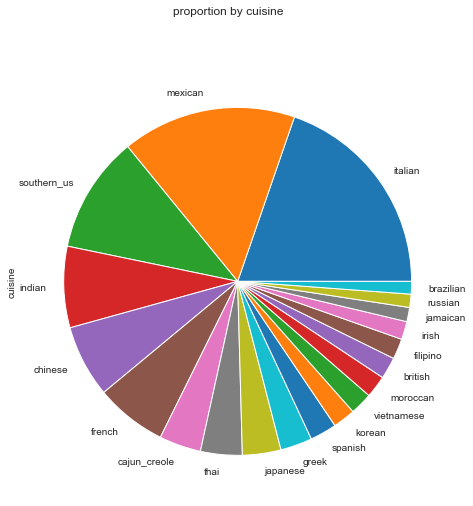

In [42]:
df['cuisine'].value_counts().plot(kind = 'pie', figsize=(10,8),subplots=True,title = 'proportion by cuisine', legend = False)

### Ingredients

In [47]:
ingredients_list = [item for sublist in df.ingredients for item in sublist]

In [51]:
import unidecode
import string

In [52]:
def refine_texts(text):
    text = unidecode.unidecode(text) # Removes Accent from the name
    text = text.lower() # Convert's everything to lowercase
    #text = text.replace(',','')
    for s in text:
        if s not in string.ascii_lowercase:
            text = text.replace(s,' ')
        else:
            continue
    return text.strip()

In [54]:
refined_ingredients = []
for item in ingredients_list:
    refined_ingredients.append(refine_texts(item))

In [55]:
len(set(refined_ingredients))

6690

6690 number of ingredients show up in total, which is pretty big. 

Since 'list' is unhashable, we convert the lists of ingredients into tuples of ingredients.

In [133]:
new_col = []
ingredients_count = []
for ingredients in df['ingredients']:
    new_list = []
    for item in ingredients:
        new_list.append(refine_texts(item))
    new_col.append(tuple(new_list))
    ingredients_count.append(len(ingredients))
    

In [104]:
df['refined_ingredients'] = pd.Series(new_col)

In [134]:
df['ingredients_count'] = pd.Series(ingredients_count)

In [142]:
df.describe(include='all')

,id,cuisine,ingredients,refined_ingredients,ingredients_count
count,39774.000000,39774,39774,39774,39774.000000
unique,NaN,20,39674,39674,NaN
top,NaN,italian,"[cold water, lime, sugar, sweetened condensed ...","(all purpose unbleached flour, active dry yeas...",NaN
freq,NaN,7838,3,3,NaN
mean,24849.536959,NaN,NaN,NaN,10.767713
std,14360.035505,NaN,NaN,NaN,4.428978
min,0.000000,NaN,NaN,NaN,1.000000
25%,12398.250000,NaN,NaN,NaN,8.000000
50%,24887.000000,NaN,NaN,NaN,10.000000
75%,37328.500000,NaN,NaN,NaN,13.000000


In [140]:
print("On average, each row (=a recipe) consists of " + str(df.ingredients_count.mean()) + " of ingredients.")

On average, each row (=a recipe) consists of 10.76771257605471 of ingredients.


It looks like there are some recipes with the same set of ingredients. For example, [cold water, lime, sugar, sweetened condensed milk] appears 3 times in the training set.

In [131]:
df[df.duplicated(['refined_ingredients'])]

,id,cuisine,ingredients,refined_ingredients
3369,46112,southern_us,"[shredded extra sharp cheddar cheese, extra-vi...","(shredded extra sharp cheddar cheese, extra vi..."
4249,33853,vietnamese,"[oil, water, rice flour, tapioca starch]","(oil, water, rice flour, tapioca starch)"
7440,30472,southern_us,"[sugar, salt, baking powder, white cornmeal, h...","(sugar, salt, baking powder, white cornmeal, h..."
7868,43565,mexican,"[sweet potatoes, ground cumin, no-salt-added d...","(sweet potatoes, ground cumin, no salt added d..."
9558,3609,italian,"[all purpose unbleached flour, active dry yeas...","(all purpose unbleached flour, active dry yeas..."
...,...,...,...,...
38461,18568,southern_us,"[McCormick Parsley Flakes, old bay seasoning, ...","(mccormick parsley flakes, old bay seasoning, ..."
38519,21659,chinese,"[soy sauce, cooking oil, garlic, honey, maltos...","(soy sauce, cooking oil, garlic, honey, maltos..."
38630,39840,southern_us,"[pork shoulder roast, sugar, hot red pepper fl...","(pork shoulder roast, sugar, hot red pepper fl..."
38645,43353,indian,"[vegetable oil, pappadams]","(vegetable oil, pappadams)"


There are 100 rows... 

In [132]:
df[df.duplicated(['cuisine','refined_ingredients'])]

,id,cuisine,ingredients,refined_ingredients
3369,46112,southern_us,"[shredded extra sharp cheddar cheese, extra-vi...","(shredded extra sharp cheddar cheese, extra vi..."
4249,33853,vietnamese,"[oil, water, rice flour, tapioca starch]","(oil, water, rice flour, tapioca starch)"
7440,30472,southern_us,"[sugar, salt, baking powder, white cornmeal, h...","(sugar, salt, baking powder, white cornmeal, h..."
7868,43565,mexican,"[sweet potatoes, ground cumin, no-salt-added d...","(sweet potatoes, ground cumin, no salt added d..."
9558,3609,italian,"[all purpose unbleached flour, active dry yeas...","(all purpose unbleached flour, active dry yeas..."
...,...,...,...,...
38461,18568,southern_us,"[McCormick Parsley Flakes, old bay seasoning, ...","(mccormick parsley flakes, old bay seasoning, ..."
38519,21659,chinese,"[soy sauce, cooking oil, garlic, honey, maltos...","(soy sauce, cooking oil, garlic, honey, maltos..."
38630,39840,southern_us,"[pork shoulder roast, sugar, hot red pepper fl...","(pork shoulder roast, sugar, hot red pepper fl..."
38645,43353,indian,"[vegetable oil, pappadams]","(vegetable oil, pappadams)"


There are 3 rows with the same set of ingredients but labeled by different cuisines.

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ingredients_count', ylabel='Density'>

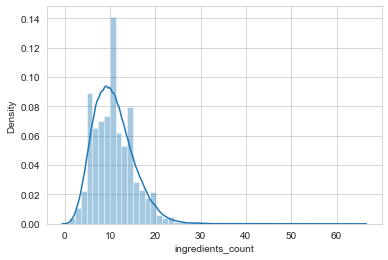

In [151]:
sns.distplot(df['ingredients_count'])

In [156]:
import matplotlib.pyplot as plt

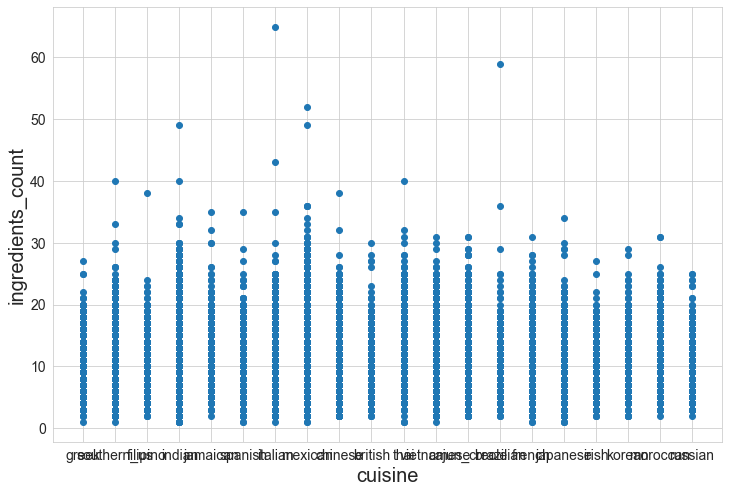

In [157]:
plt.figure(figsize=(12,8))

plt.scatter(df.cuisine,
               df.ingredients_count)

plt.xlabel("cuisine", fontsize=20)
plt.ylabel("ingredients_count", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [160]:
plt.close()

In [164]:
pd.get_dummies(df, columns = ['cuisine'])

,id,ingredients,refined_ingredients,ingredients_count,cuisine_brazilian,cuisine_british,cuisine_cajun_creole,cuisine_chinese,cuisine_filipino,cuisine_french,...,cuisine_jamaican,cuisine_japanese,cuisine_korean,cuisine_mexican,cuisine_moroccan,cuisine_russian,cuisine_southern_us,cuisine_spanish,cuisine_thai,cuisine_vietnamese
0,10259,"[romaine lettuce, black olives, grape tomatoes...","(romaine lettuce, black olives, grape tomatoes...",9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...","(plain flour, ground pepper, salt, tomatoes, g...",11,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","(eggs, pepper, salt, mayonaise, cooking oil, g...",12,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,"[water, vegetable oil, wheat, salt]","(water, vegetable oil, wheat, salt)",4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,"[black pepper, shallots, cornflour, cayenne pe...","(black pepper, shallots, cornflour, cayenne pe...",20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,"[light brown sugar, granulated sugar, butter, ...","(light brown sugar, granulated sugar, butter, ...",12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,"[KRAFT Zesty Italian Dressing, purple onion, b...","(kraft zesty italian dressing, purple onion, b...",7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,"[eggs, citrus fruit, raisins, sourdough starte...","(eggs, citrus fruit, raisins, sourdough starte...",12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,"[boneless chicken skinless thigh, minced garli...","(boneless chicken skinless thigh, minced garli...",21,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
df

,id,cuisine,ingredients,refined_ingredients,ingredients_count
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","(romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","(plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","(eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]","(water, vegetable oil, wheat, salt)",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","(black pepper, shallots, cornflour, cayenne pe...",20
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","(light brown sugar, granulated sugar, butter, ...",12
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","(kraft zesty italian dressing, purple onion, b...",7
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","(eggs, citrus fruit, raisins, sourdough starte...",12
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","(boneless chicken skinless thigh, minced garli...",21


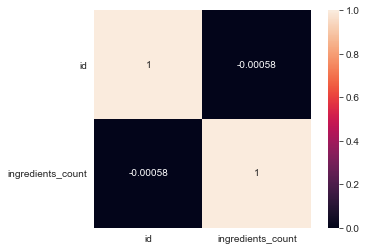

In [165]:
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

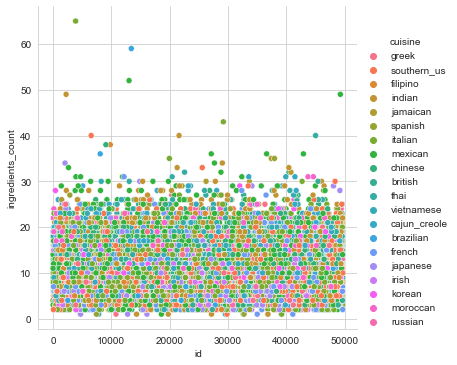

In [169]:
sns.relplot(x='id', y='ingredients_count', hue='cuisine', data=df)

### Filter by special ingredients

In [175]:
df.index

RangeIndex(start=0, stop=39774, step=1)

In [230]:
# For an ingredient, if it shows up in a cuisine, say 'italian', 
# then we store them in a dictionary with 
# key-the ingredient & value- 'italian'

ingredient_cuisine = {}
for i in df.index:
    for ingredient in df['refined_ingredients'][i]:
        if ingredient not in ingredient_cuisine:
            ingredient_cuisine[ingredient] = tuple(cuisine_vector(i))
        else:
            ingredient_cuisine[ingredient] = tuple(np.array(ingredient_cuisine[ingredient]) + np.array(cuisine_vector(i)))
    
        
    

In [233]:
ingredient_cuisine['black olives']

(0, 0, 2, 0, 0, 21, 31, 0, 0, 67, 0, 0, 0, 92, 8, 1, 3, 4, 0, 0)

In [220]:
def cuisine_vector(row):
    v = []
    for i in range(20):
        v.append(cuisine.iloc[row][int(4+i)])
    return v
    